In [28]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
pip install TextBlob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import neattext.functions as nfx
import pandas as pd 

# Read The Dataset
data = pd.read_csv('after.csv',  encoding='ISO-8859-1')

# Select the desired column from the dataset
tweet_text = data['Tweet']

# Preprocessing -- Data Cleaning 
# Remove Hashtags
clean_tweet = tweet_text.apply(nfx.remove_hashtags)
#Remove Users
clean_tweet = clean_tweet.apply(lambda x: nfx.remove_userhandles(x))
#Remove Multiple Spaces
clean_tweet = clean_tweet.apply(nfx.remove_multiple_spaces)
#Remove URLs
clean_tweet = clean_tweet.apply(nfx.remove_urls)
#Remove Special Characters
clean_tweet = clean_tweet.apply(nfx.remove_puncts)
clean_tweet = clean_tweet.apply(nfx.remove_emojis)
clean_tweet = clean_tweet.apply(nfx.remove_special_characters)
clean_tweet = clean_tweet.apply(nfx.remove_punctuations)
#Remove Dates
clean_tweet = clean_tweet.apply(nfx.remove_dates)
#Remove Emails and Phone numbers
clean_tweet = clean_tweet.apply(nfx.remove_emails)
clean_tweet = clean_tweet.apply(nfx.remove_phone_numbers)

print('Done')

Done


In [30]:
from textblob import TextBlob

# Model 
def get_sentiment(clean_tweet):
    blob = TextBlob(clean_tweet)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

# Save the results 
sentiment_results= clean_tweet.apply(get_sentiment)

# Add the results to the data file
data = data.join(pd.json_normalize(sentiment_results)) 

print('done')

done


In [31]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.5 MB/s eta 0:00:00


In [32]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax 

#Loading Model and Tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment" 
model = AutoModelForSequenceClassification.from_pretrained(roberta) 
tokenizer = AutoTokenizer.from_pretrained(roberta)

#The Labels
labels = ['Negative', 'Neutral', 'Positive']
labels_df = []
for index in data.index:
    #Sentiment Analysis
    encoded_tweet = tokenizer(clean_tweet[index], return_tensors='pt')

    output = model(**encoded_tweet)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    highest_score = scores[0]
    label = labels[0]
    i = 0
    for score in scores:
        if score > highest_score:
            highest_score = score
            label = labels[i]
        i+=1
    print("The result: ",highest_score, label)

    labels_df.insert(index,label)
    print('************************************************\n')

#Add the preprossed text and the labels into the data frame
data['Tweet'] = clean_tweet
data['Label'] = labels_df


Streaming output truncated to the last 5000 lines.
************************************************

The result:  0.5387444 Neutral
************************************************

The result:  0.5976047 Neutral
************************************************

The result:  0.59056 Neutral
************************************************

The result:  0.49746993 Positive
************************************************

The result:  0.64690536 Neutral
************************************************

The result:  0.74387395 Positive
************************************************

The result:  0.74387395 Positive
************************************************

The result:  0.66858363 Neutral
************************************************

The result:  0.5810014 Neutral
************************************************

The result:  0.5572068 Neutral
************************************************

The result:  0.7069077 Neutral
************************************************

Th

Text(0.5, 1.0, 'Roberta result after the Show')

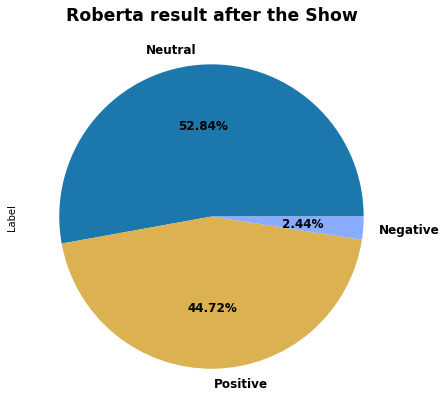

In [36]:
#visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

label_theme = ['#1c78ac', '#dbb152','#89acff'] # color palette
pie = data['Label'].value_counts().plot.pie(figsize=(7,7),autopct= "%.2f%%", colors = label_theme, 
                                                  textprops={'color':"black", 'size' : 'large', 'fontweight' : 'bold'})
pie.set_title('Roberta result after the Show', fontdict = {'color':"black", 'size' : 'xx-large', 'fontweight' : 'bold'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


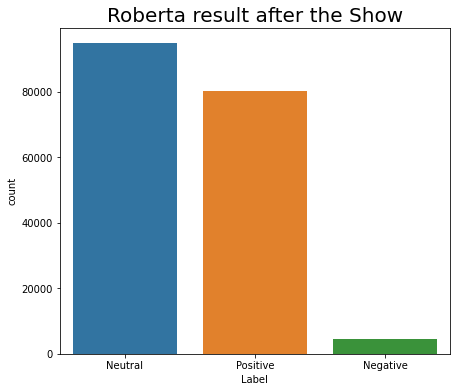

In [37]:
# The number of data label and their value counts
plt.figure(figsize=(7,6))
sns.countplot(data['Label'])
plt.title("Roberta result after the Show", fontsize=20)
plt.show()